<h1>Student Mental Health</h1>
    Este trabalho representa o Projeto Final do bootcamp realizado no Lamia, cujo principal propósito consiste em identificar grupos de indivíduos que apresentam doenças mentais com base em dados meticulosamente coletados.
<h2>Introdução</h2>
    As doenças mentais entre estudantes são uma preocupação crescente nas instituições de ensino em todo o mundo. A pressão acadêmica, as expectativas sociais e as mudanças na vida estudantil podem desencadear uma série de desafios emocionais. Entre as condições mentais mais comuns que afetam estudantes, destacam-se a depressão, a ansiedade e os ataques de pânico.
<h3>Depressão</h3>
    Transtorno caracterizado por sentimentos persistentes de tristeza, desesperança e falta de interesse nas atividades cotidianas. Estudantes com depressão podem ter dificuldade em se concentrar, falta de energia e uma visão negativa de si mesmos e de seu futuro. É importante ressaltar que a depressão não é apenas "tristeza" e requer atenção profissional.
<h3>Ansiedade</h3>
    Ela pode se manifestar de várias maneiras, incluindo preocupações excessivas, tensão muscular e nervosismo. A ansiedade pode atrapalhar o desempenho acadêmico e a qualidade de vida dos estudantes se não for tratada adequadamente.

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error  # Add this line
import warnings
import xgboost as xg 
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('students_mental_health_survey.csv')

In [3]:
len(data)

7022

In [4]:
data.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [5]:
data.shape

(7022, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

<h1>Data Cleaning</h1>
A partir dos dados coletados, foi percebido tais problemas:
<li>Tratar valores nulos</li>
<li>Formatar colunas categóricas, para serem codificadas numericamente.</li>


In [7]:
data.isnull().sum()

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

In [8]:
#Tratar valores vazios
data=data.dropna()
data.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
5,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,High,Single,Never,Never,No,No,5,Moderate,19,Off-Campus


In [9]:
data.shape

(6995, 20)

In [10]:
# Formatar colunas
cat = data.select_dtypes(include='object')
cat.head(20)

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,Others,Male,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,Moderate,On-Campus
1,Engineering,Female,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,Low,On-Campus
2,Business,Female,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,High,On-Campus
4,Business,Male,Good,Low,Average,High,Married,Never,Never,No,Yes,High,On-Campus
5,Medical,Female,Good,Moderate,Good,High,Single,Never,Never,No,No,Moderate,Off-Campus
6,Law,Male,Good,Moderate,Average,Moderate,Single,Never,Never,No,No,Moderate,Off-Campus
7,Business,Female,Average,Low,Average,Low,Married,Never,Never,Yes,No,Moderate,On-Campus
8,Medical,Male,Poor,Low,Average,Moderate,Single,Frequently,Never,Yes,No,Low,On-Campus
12,Computer Science,Male,Average,Moderate,Average,Moderate,In a Relationship,Never,Occasionally,No,No,High,On-Campus
13,Medical,Male,Average,Moderate,Average,High,In a Relationship,Never,Occasionally,No,No,Moderate,With Family


In [11]:
Family_History_maping ={1:'Yes', 0:'No'}
Chronic_Illness_mapping={1:'Yes', 0:'No'}

for i in ['Family_History','Chronic_Illness']:
    cat[i] = cat[i].replace({'Yes':1,'No':0})

In [12]:
Physical_Activity_mapping={'Low':1,'Moderate':2,'High':3}
Social_Support_mapping ={'Low':1,'Moderate':2,'High':3}
Extracurricular_Involvement_mapping ={'Low':1,'Moderate':2,'High':3}

for i in ['Physical_Activity','Social_Support','Extracurricular_Involvement']:
    cat[i] = cat[i].replace({'Low':1,'Moderate':2,'High':3})

In [13]:
Sleep_Quality_mapping={'Poor':1,'Average':2,'Good':3}
Diet_Quality_mapping ={'Poor':1,'Average':2,'Good':3} 

for i in ['Sleep_Quality','Diet_Quality']:
    cat[i] = cat[i].replace({'Poor':1,'Average':2,'Good':3})

In [14]:
Substance_Use_mapping = {'Never':0,'Occasionally':1,'Frequently':2}
Counseling_Service_Use_mapping= {'Never':0,'Occasionally':1,'Frequently':2}

for i in ['Substance_Use','Counseling_Service_Use']:
    cat[i] = cat[i].replace({'Never':0,'Occasionally':1,'Frequently':2})

In [15]:
cursos_unicos = data['Course'].unique()
course_mapping ={'Others':0,'Engineering':1,'Business':2,'Medical':3,'Law':4,'Computer Science':5}
print(course_mapping)
cat['Course'] = cat['Course'].replace({'Others':0,'Engineering':1,'Business':2,'Medical':3,'Law':4,'Computer Science':5})

{'Others': 0, 'Engineering': 1, 'Business': 2, 'Medical': 3, 'Law': 4, 'Computer Science': 5}


In [16]:
gender_mapping= {'Male':1,'Female':0}
cat['Gender'] = cat['Gender'].replace({'Male':1,'Female':0})
cat.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,0,1,3,2,3,2,Married,0,0,0,0,2,On-Campus
1,1,0,2,1,2,1,Single,1,1,0,0,1,On-Campus
2,2,0,3,1,2,2,In a Relationship,0,1,0,0,3,On-Campus
4,2,1,3,1,2,3,Married,0,0,0,1,3,On-Campus
5,3,0,3,2,3,3,Single,0,0,0,0,2,Off-Campus


In [17]:
relationship_unico = data['Relationship_Status'].unique()
print(relationship_unico)   
relationship_mapping = {'Married':0,'Single':1,'In a Relationship':2}
cat['Relationship_Status'] = cat['Relationship_Status'].replace({'Married':0,'Single':1,'In a Relationship':2})
cat.head()

['Married' 'Single' 'In a Relationship']


,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,0,1,3,2,3,2,0,0,0,0,0,2,On-Campus
1,1,0,2,1,2,1,1,1,1,0,0,1,On-Campus
2,2,0,3,1,2,2,2,0,1,0,0,3,On-Campus
4,2,1,3,1,2,3,0,0,0,0,1,3,On-Campus
5,3,0,3,2,3,3,1,0,0,0,0,2,Off-Campus


In [18]:
residence_unico = data['Residence_Type'].unique()
print(residence_unico)
residence_mapping = {'On-Campus':0,'Off-Campus':1,'With Family':2}
cat['Residence_Type'] = cat['Residence_Type'].replace({'On-Campus':0,'Off-Campus':1,'With Family':2})
cat.head()

['On-Campus' 'Off-Campus' 'With Family']


,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type
0,0,1,3,2,3,2,0,0,0,0,0,2,0
1,1,0,2,1,2,1,1,1,1,0,0,1,0
2,2,0,3,1,2,2,2,0,1,0,0,3,0
4,2,1,3,1,2,3,0,0,0,0,1,3,0
5,3,0,3,2,3,3,1,0,0,0,0,2,1


In [19]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6995 entries, 0 to 7020
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Course                       6995 non-null   int64
 1   Gender                       6995 non-null   int64
 2   Sleep_Quality                6995 non-null   int64
 3   Physical_Activity            6995 non-null   int64
 4   Diet_Quality                 6995 non-null   int64
 5   Social_Support               6995 non-null   int64
 6   Relationship_Status          6995 non-null   int64
 7   Substance_Use                6995 non-null   int64
 8   Counseling_Service_Use       6995 non-null   int64
 9   Family_History               6995 non-null   int64
 10  Chronic_Illness              6995 non-null   int64
 11  Extracurricular_Involvement  6995 non-null   int64
 12  Residence_Type               6995 non-null   int64
dtypes: int64(13)
memory usage: 765.1 KB


In [20]:
num = data.select_dtypes(include=np.number)
num.head()

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
0,25,3.56,3,3,2,2,17
1,24,2.44,0,3,0,3,27
2,19,3.74,4,0,3,4,15
4,18,3.40,3,3,4,0,23
5,21,3.35,2,4,3,5,19


In [21]:
data=pd.concat([cat,num],axis=1)
data.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
0,0,1,3,2,3,2,0,0,0,0,0,2,0,25,3.56,3,3,2,2,17
1,1,0,2,1,2,1,1,1,1,0,0,1,0,24,2.44,0,3,0,3,27
2,2,0,3,1,2,2,2,0,1,0,0,3,0,19,3.74,4,0,3,4,15
4,2,1,3,1,2,3,0,0,0,0,1,3,0,18,3.40,3,3,4,0,23
5,3,0,3,2,3,3,1,0,0,0,0,2,1,21,3.35,2,4,3,5,19


In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# usado para garantir que todas as características tenham a mesma escala
mmax = MinMaxScaler()
data=pd.concat([cat,num],axis=1)
data.head()


,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
0,0,1,3,2,3,2,0,0,0,0,0,2,0,25,3.56,3,3,2,2,17
1,1,0,2,1,2,1,1,1,1,0,0,1,0,24,2.44,0,3,0,3,27
2,2,0,3,1,2,2,2,0,1,0,0,3,0,19,3.74,4,0,3,4,15
4,2,1,3,1,2,3,0,0,0,0,1,3,0,18,3.40,3,3,4,0,23
5,3,0,3,2,3,3,1,0,0,0,0,2,1,21,3.35,2,4,3,5,19


In [24]:

data.columns

Index(['Course', 'Gender', 'Sleep_Quality', 'Physical_Activity',
       'Diet_Quality', 'Social_Support', 'Relationship_Status',
       'Substance_Use', 'Counseling_Service_Use', 'Family_History',
       'Chronic_Illness', 'Extracurricular_Involvement', 'Residence_Type',
       'Age', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score',
       'Financial_Stress', 'Semester_Credit_Load'],
      dtype='object')

In [25]:
scale=['Sleep_Quality', 'Physical_Activity',
       'Diet_Quality', 'Social_Support','Extracurricular_Involvement','Age', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score',
       'Financial_Stress', 'Semester_Credit_Load']

In [26]:
data[scale] = mmax.fit_transform(data[scale])
data.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Extracurricular_Involvement,Residence_Type,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
0,0,1,1.0,0.5,1.0,0.5,0,0,0,0,0,0.5,0,0.411765,0.717949,0.6,0.6,0.4,0.4,0.142857
1,1,0,0.5,0.0,0.5,0.0,1,1,1,0,0,0.0,0,0.352941,0.000000,0.0,0.6,0.0,0.6,0.857143
2,2,0,1.0,0.0,0.5,0.5,2,0,1,0,0,1.0,0,0.058824,0.833333,0.8,0.0,0.6,0.8,0.000000
4,2,1,1.0,0.0,0.5,1.0,0,0,0,0,1,1.0,0,0.000000,0.615385,0.6,0.6,0.8,0.0,0.571429
5,3,0,1.0,0.5,1.0,1.0,1,0,0,0,0,0.5,1,0.176471,0.583333,0.4,0.8,0.6,1.0,0.285714


In [28]:
# Colunas que foram escalonadas
scale=['Sleep_Quality', 'Physical_Activity',
       'Diet_Quality', 'Social_Support','Extracurricular_Involvement','Age', 'CGPA', 'Stress_Level', 'Depression_Score', 'Anxiety_Score','Financial_Stress',
       'Semester_Credit_Load']

# Crie um novo DataFrame com as colunas originalmente escalonadas
scaled_data = data[scale]

# Reverter a escala para os valores originais
scaled_data = mmax.inverse_transform(scaled_data)

# Substitua as colunas no DataFrame original pelos valores revertidos
data[scale] = scaled_data


<h1>Análise Exploratória de Dados (EDA)</h1>

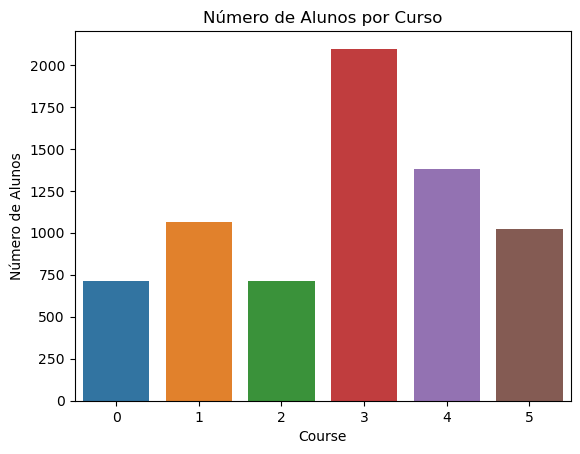

In [29]:
colunas_a_converter = ['Sleep_Quality', 'Physical_Activity', 'Diet_Quality','Social_Support','Extracurricular_Involvement','Stress_Level','Depression_Score','Anxiety_Score','Financial_Stress','Semester_Credit_Load','Age']
data[colunas_a_converter] = data[colunas_a_converter].astype(int)

# Crie um gráfico de barras
sns.countplot(data=data, x='Course')
plt.xlabel('Course')
plt.ylabel('Número de Alunos')
plt.title('Número de Alunos por Curso')
plt.show()

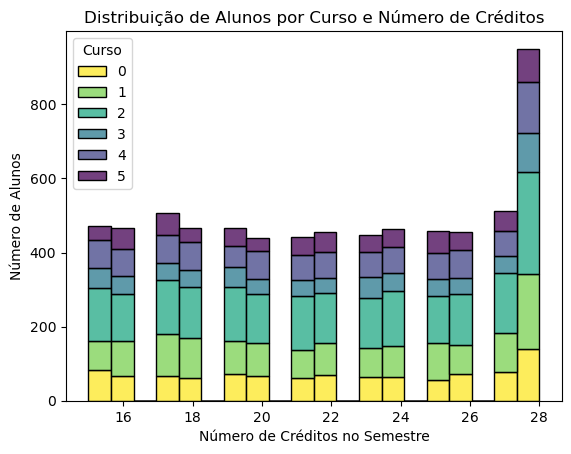

In [30]:
data_filtered = data[['Course', 'Semester_Credit_Load']]

# Crie o gráfico de barras empilhadas
sns.histplot(data=data_filtered, x='Semester_Credit_Load', hue='Course', multiple='stack', bins=20, palette='viridis')
plt.xlabel('Número de Créditos no Semestre')
plt.ylabel('Número de Alunos')
plt.title('Distribuição de Alunos por Curso e Número de Créditos')

# Adicione a legenda de cores
plt.legend(title='Curso', labels=data['Course'].unique())

plt.show()


<li>A maior quantidade de resposta se concentra em alunos de medicina, direito e cientista da computação </li>
<li>Os alunos que tem mais creditos semestrais são os de ciência da computação.</li>
<li>Os alunos independente do curso, a maior parte pega a máxima quantidade de creditos</li>

In [31]:
dicionario_invertido = {valor: chave for chave, valor in course_mapping.items()}

In [32]:
dicionario_invertido

{0: 'Others',
 1: 'Engineering',
 2: 'Business',
 3: 'Medical',
 4: 'Law',
 5: 'Computer Science'}

In [33]:
data['Course_name'] = data['Course'].apply(lambda x: dicionario_invertido[x])

[2 0 3 4 5 1]


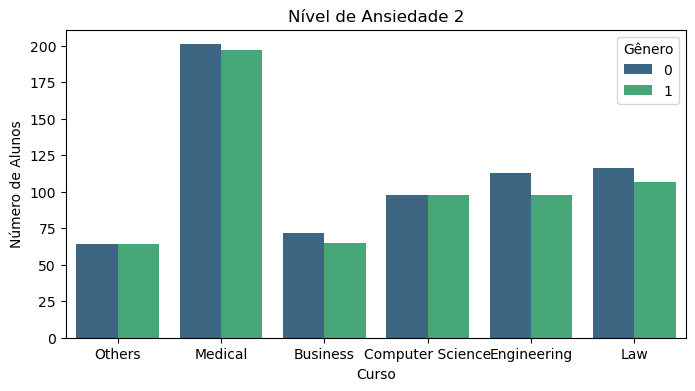

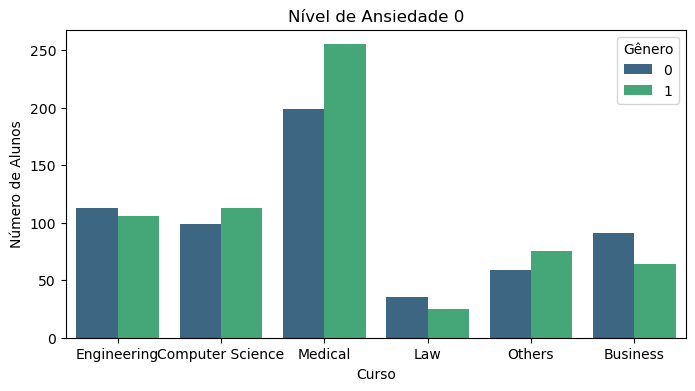

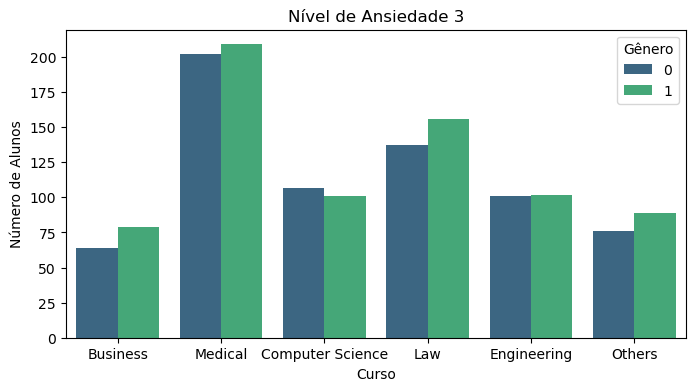

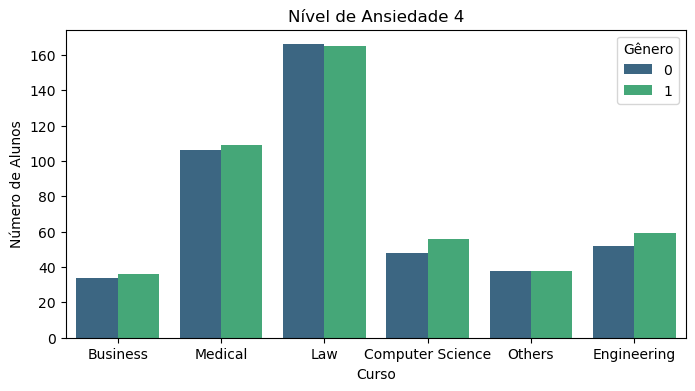

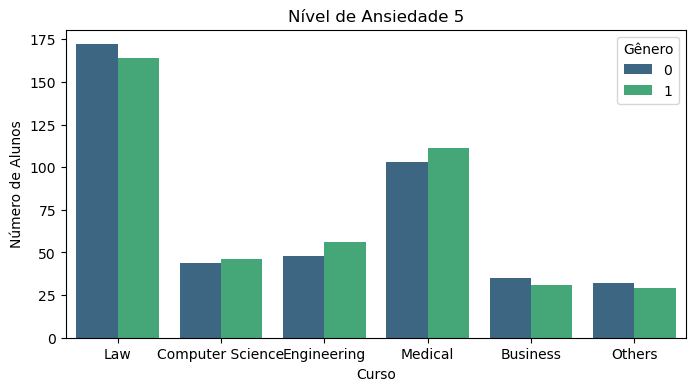

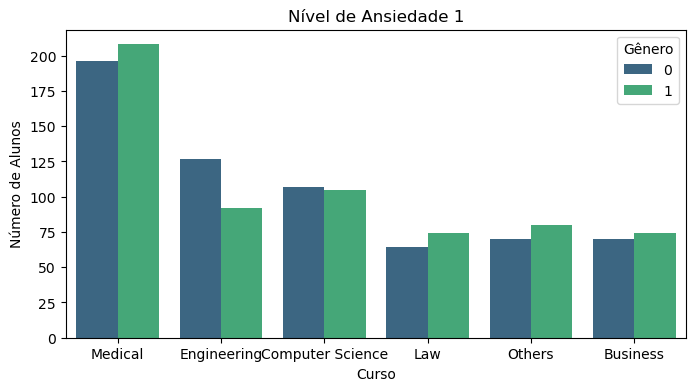

In [34]:
# Níveis de ansiedade disponíveis
niveis_ansiedade = data['Anxiety_Score'].unique()
print(niveis_ansiedade)
for nivel in niveis_ansiedade:
    plt.figure(figsize=(8, 4))  # Tamanho da figura
    subset = data[data['Anxiety_Score'] == nivel]  # Subconjunto de dados para o nível de ansiedade atual
    sns.countplot(data=subset, x='Course_name', hue='Gender', palette='viridis')
    plt.xlabel('Curso')
    plt.ylabel('Número de Alunos')
    plt.title(f'Nível de Ansiedade {nivel}')
    plt.legend(title='Gênero')
    plt.show()



In [35]:
print(course_mapping)

{'Others': 0, 'Engineering': 1, 'Business': 2, 'Medical': 3, 'Law': 4, 'Computer Science': 5}


<h2>Anxiety x Course</h2>
<li>Others e Business são os que tem menos alunos com ansiedade</li>
<li>Data Computer e engenharia tem quase os mesmos valores</li>
<li>Medicina é o que mais tem gente ansiosa</li>
<li>Direito é extremos, ou não tem ansiedade ou tem demais</li>

[3 0 4 2 1 5]


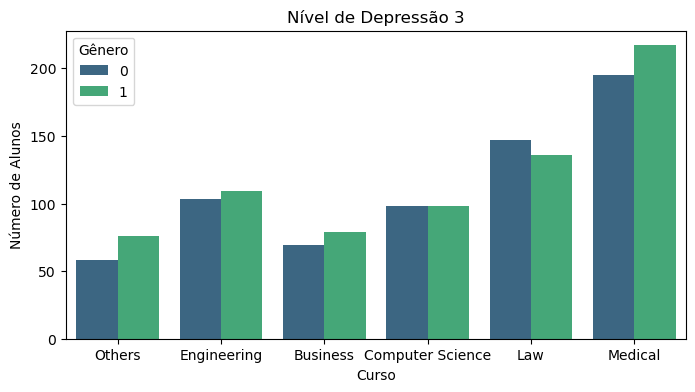

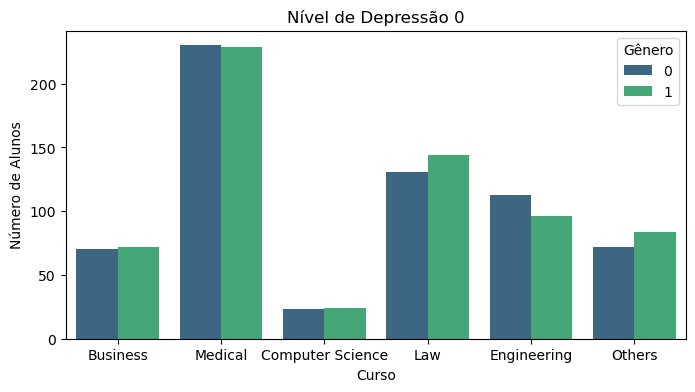

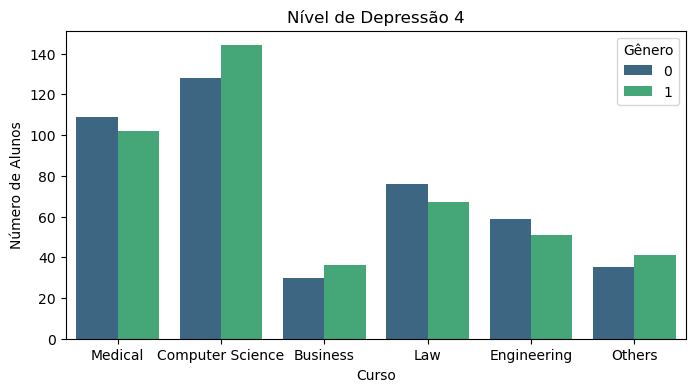

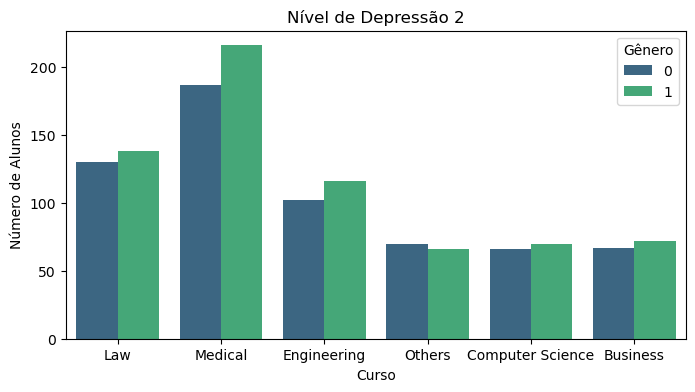

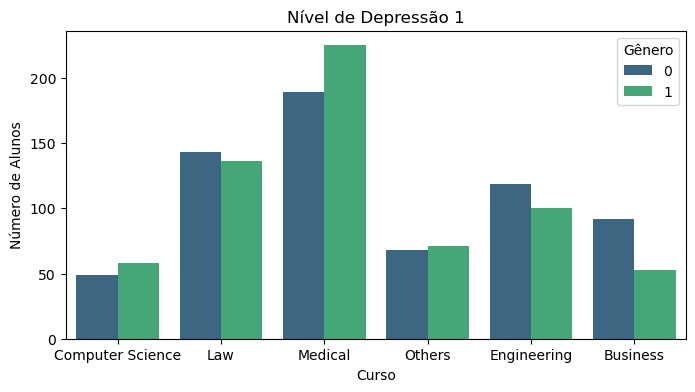

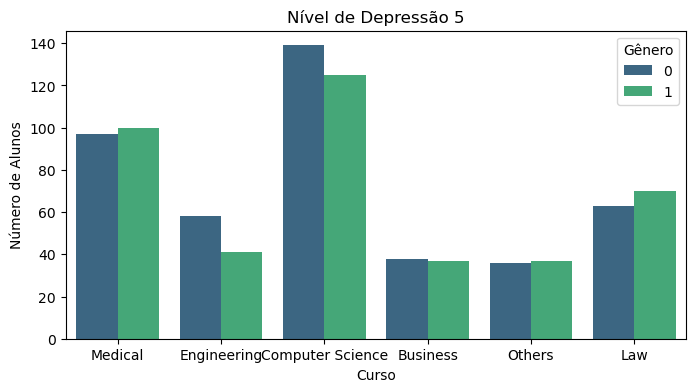

In [36]:
# Níveis de depressão disponíveis
niveis_ansiedade = data['Depression_Score'].unique()
print(niveis_ansiedade)
for nivel in niveis_ansiedade:
    plt.figure(figsize=(8, 4))  # Tamanho da figura
    subset = data[data['Depression_Score'] == nivel]  # Subconjunto de dados para o nível de ansiedade atual
    sns.countplot(data=subset, x='Course_name', hue='Gender', palette='viridis')
    plt.xlabel('Curso')
    plt.ylabel('Número de Alunos')
    plt.title(f'Nível de Depressão {nivel}')
    plt.legend(title='Gênero')
    plt.show()


<h2>Depression x Course</h2>
<li>A maior parte dos cursos mantiveram as estatisticas da ansiedade. </li>
<li>Menos Direito que se mostrou menos depressiva.</li>
<li>A maior discrepância foi Computação, que tem os maiores niveis de ansiedade e além disso o maior nivel é das mulheres.</li>

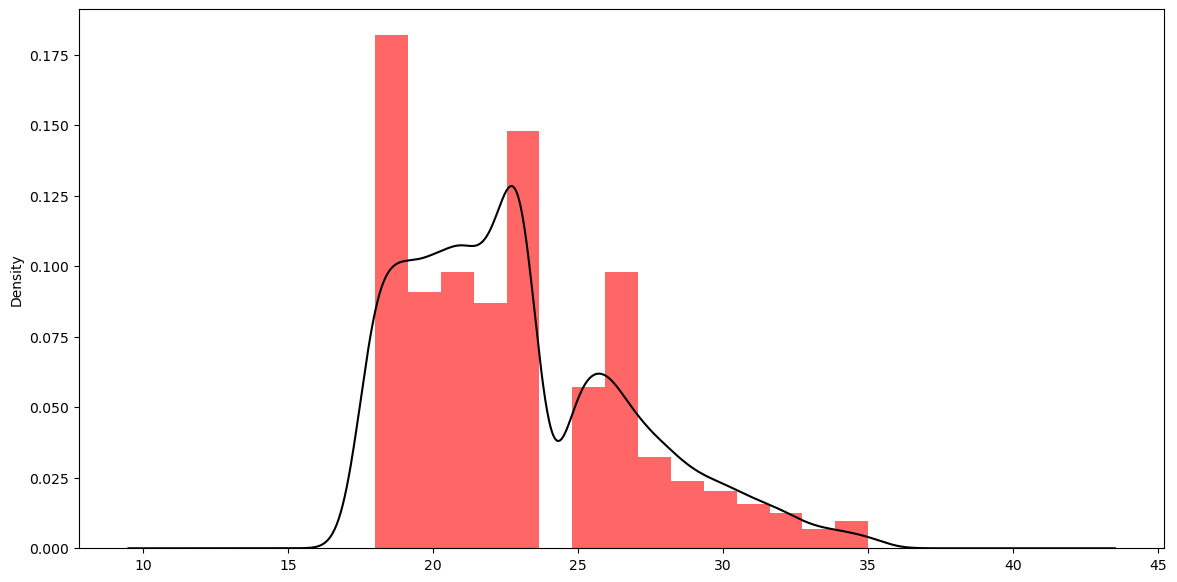

In [37]:
plt.figure(figsize=(14,7))
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
data["Age"].plot(kind='density', color='black')
plt.show()

<li>Temos alunos entre 18 - 35</li>
<li>Não tems muitas respostas entre 27 - 35</li>

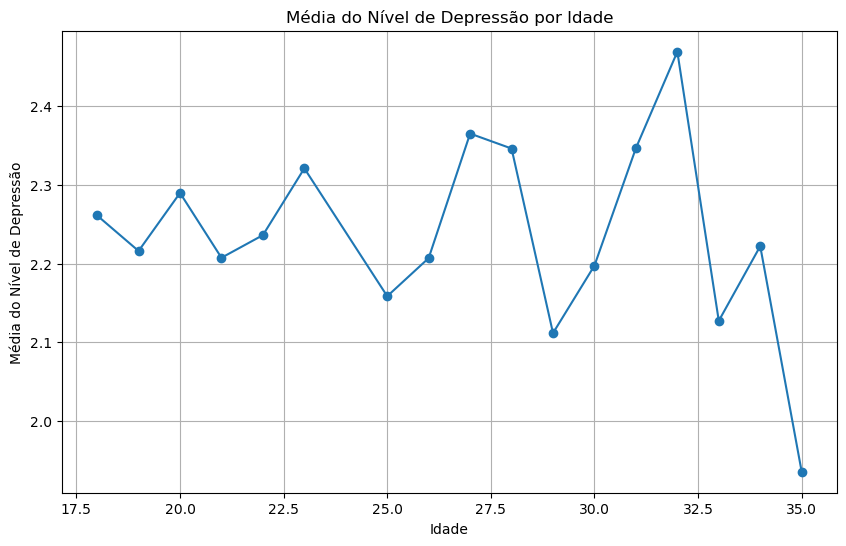

In [38]:
# Calcule a média do nível de depressão para cada idade
mean_depression_by_age = data.groupby('Age')['Depression_Score'].mean()

# Crie um gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(mean_depression_by_age.index, mean_depression_by_age.values, marker='o')
plt.title('Média do Nível de Depressão por Idade')
plt.xlabel('Idade')
plt.ylabel('Média do Nível de Depressão')
plt.grid(True)
plt.show()

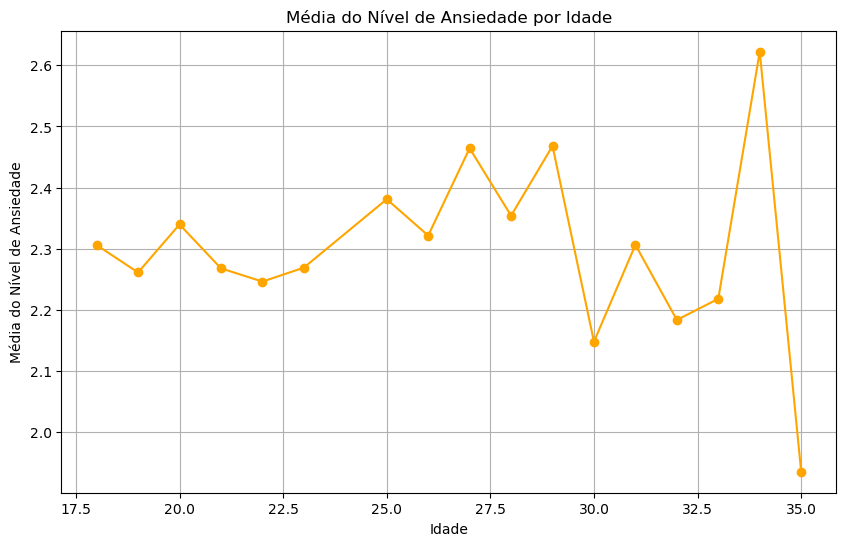

In [39]:
# Calcule a média do nível de ansiedade para cada idade
mean_anxiety_by_age = data.groupby('Age')['Anxiety_Score'].mean()

# Crie um gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(mean_anxiety_by_age.index, mean_anxiety_by_age.values, marker='o', color='orange')
plt.title('Média do Nível de Ansiedade por Idade')
plt.xlabel('Idade')
plt.ylabel('Média do Nível de Ansiedade')
plt.grid(True)
plt.show()

<li>A maior parte tem uma media alta de ansiedade e depressão.</li><li>A idade dos 30 aos 35 parecem serem criticas pras situações de ansiedade e depressão</li>

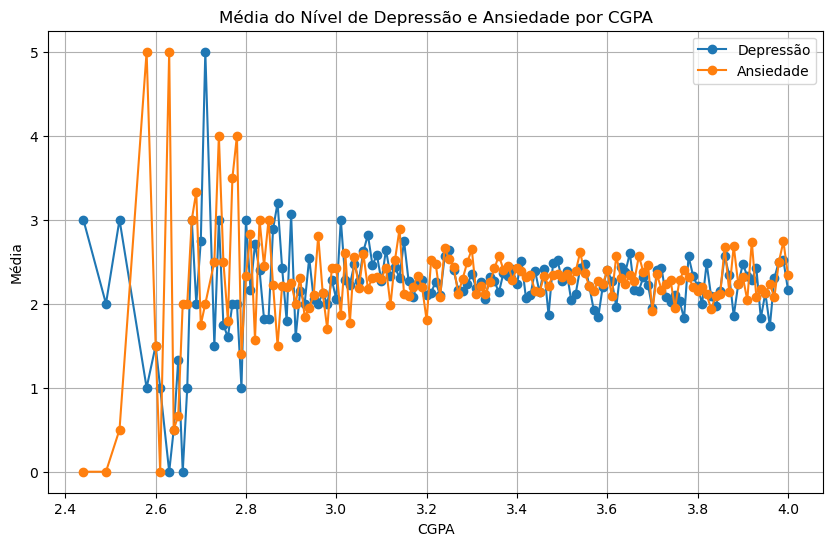

In [40]:
# Criando o gráfico de dispersão
data['CGPA'] = data['CGPA'].round(2)
# Calcule a média do nível de depressão para cada CGPA
mean_depression_by_cgpa = data.groupby('CGPA')['Depression_Score'].mean()

# Calcule a média do nível de ansiedade para cada CGPA
mean_anxiety_by_cgpa = data.groupby('CGPA')['Anxiety_Score'].mean()

# Crie um gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(mean_depression_by_cgpa.index, mean_depression_by_cgpa.values, label='Depressão', marker='o')
plt.plot(mean_anxiety_by_cgpa.index, mean_anxiety_by_cgpa.values, label='Ansiedade', marker='o')
plt.title('Média do Nível de Depressão e Ansiedade por CGPA')
plt.xlabel('CGPA')
plt.ylabel('Média')
plt.legend()
plt.grid(True)
plt.show()


<li>Menores CGPA mostram maiores niveis de ansiedade e depressão.</li>


In [42]:
data.head()

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,...,Extracurricular_Involvement,Residence_Type,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load,Course_name
0,0,1,3,2,3,2,0,0,0,0,...,2,0,25,3.56,3,3,2,2,17,Others
1,1,0,2,1,2,1,1,1,1,0,...,1,0,23,2.44,0,3,0,3,27,Engineering
2,2,0,3,1,2,2,2,0,1,0,...,3,0,19,3.74,4,0,3,4,15,Business
4,2,1,3,1,2,3,0,0,0,0,...,3,0,18,3.40,3,3,4,0,23,Business
5,3,0,3,2,3,3,1,0,0,0,...,2,1,21,3.35,2,4,3,5,19,Medical


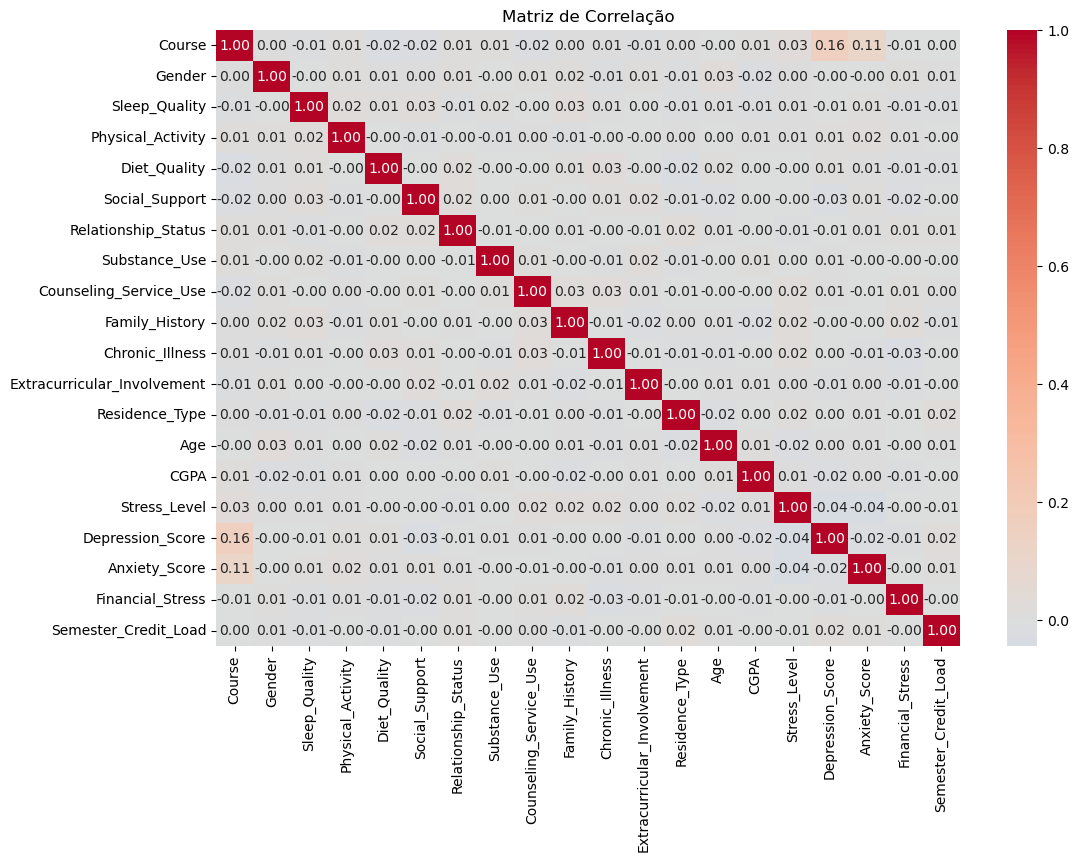

In [43]:
# Correlation matrix
corrmat = data.corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Matriz de Correlação')
plt.show()


In [47]:
X = data.drop(["Depression_Score","Course_name"],axis=1)
y = data["Depression_Score"]

In [48]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 4896, number of used features: 19
[LightGBM] [Info] Start training from score -1.664220
[LightGBM] [Info] Start training from score -1.706077
[LightGBM] [Info] Start training from score -1.691559
[LightGBM] [Info] Start training from score -1.602517
[LightGBM] [Info] Start training from score -2.092600
[LightGBM] [Info] Start training from score -2.119447
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.19      0.27      0.22       361
           1       0.20      0.19      0.20       414
           2       0.16      0.17      0.17       398
           3       0.22      0.25      0.23       399
           4       0.16   

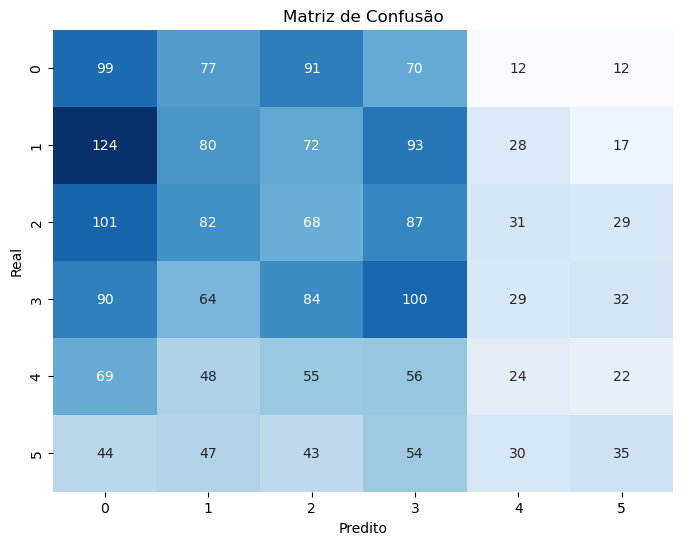

Acurácia: 0.19342544068604098
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.19      0.27      0.22       361
           1       0.20      0.19      0.20       414
           2       0.16      0.17      0.17       398
           3       0.22      0.25      0.23       399
           4       0.16      0.09      0.11       274
           5       0.24      0.14      0.17       253

    accuracy                           0.19      2099
   macro avg       0.19      0.19      0.18      2099
weighted avg       0.19      0.19      0.19      2099

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.18      0.27      0.22       361
           1       0.21      0.20      0.20       414
           2       0.18      0.18      0.18       398
           3       0.21      0.26      0.23       399
           4       0.22      0.12      0.16       274
           5       0.23      0.12      0.16   

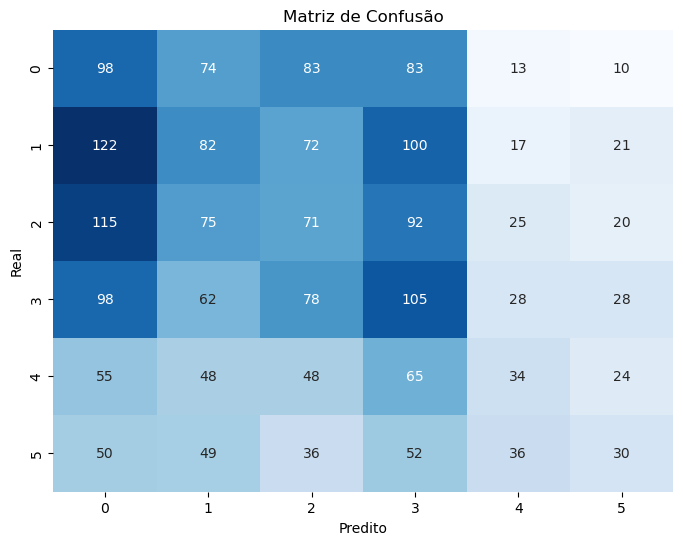

Acurácia: 0.20009528346831826
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.18      0.27      0.22       361
           1       0.21      0.20      0.20       414
           2       0.18      0.18      0.18       398
           3       0.21      0.26      0.23       399
           4       0.22      0.12      0.16       274
           5       0.23      0.12      0.16       253

    accuracy                           0.20      2099
   macro avg       0.21      0.19      0.19      2099
weighted avg       0.20      0.20      0.20      2099



In [49]:
# Pipelines para modelos de classificação
#pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier())])
pipeline_xg = Pipeline([('xg_classifier', xg.XGBClassifier(num_classes = 6) )])
pipeline_lgbm = Pipeline([('lgbm_classifier', lgb.LGBMClassifier(num_classes = 6) )])
#pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
#pipeline_svr = Pipeline([('svr_classifier', SVM())])

# Lista de todos os pipelines
classifier_pipelines = [ 
                        #pipeline_dt, 
                        #pipeline_rf, 
                        #pipeline_svm,
                        pipeline_xg,
                        pipeline_lgbm
]

# Dicionário de pipelines e tipos de classificadores para facilitar a referência
classifier_pipe_dict = {
                        #0: 'Decision Tree Classifier',
                        #1: 'Random Forest Classifier',
                        #2: 'SVM'
                        3: 'XGBoost Classifier',
                        4: 'LGBM Classifier'
}

# Ajuste dos pipelines
for pipe in classifier_pipelines:
    pipe.fit(X_train, y_train)

# Avaliação do desempenho usando o erro médio quadrático
cv_results_mse = []
for i, model in zip(classifier_pipe_dict.keys(),classifier_pipelines):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {accuracy}")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred))


In [50]:
w = data.drop(["Anxiety_Score" ,"Course_name"],axis=1)
z = data["Anxiety_Score"]

In [51]:
#spliting test and training sets
w_train, w_test, z_train,z_test = train_test_split(w, z, test_size = 0.3)

In [52]:
z_test.value_counts()

3    434
1    373
0    366
2    366
4    285
5    275
Name: Anxiety_Score, dtype: int64

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 4896, number of used features: 19
[LightGBM] [Info] Start training from score -1.729982
[LightGBM] [Info] Start training from score -1.700468
[LightGBM] [Info] Start training from score -1.664220
[LightGBM] [Info] Start training from score -1.599479
[LightGBM] [Info] Start training from score -2.063234
[LightGBM] [Info] Start training from score -2.105933
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.20      0.23      0.22       366
           1       0.15      0.16      0.15       373
           2       0.14      0.17      0.15       366
           3       0.19      0.22      0.20       434
           4       0.21   

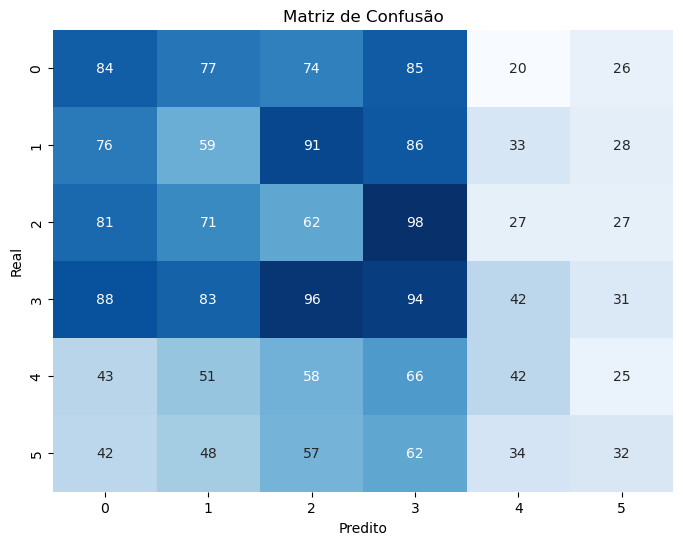

Acurácia: 0.17770366841353025
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.20      0.23      0.22       366
           1       0.15      0.16      0.15       373
           2       0.14      0.17      0.15       366
           3       0.19      0.22      0.20       434
           4       0.21      0.15      0.17       285
           5       0.19      0.12      0.14       275

    accuracy                           0.18      2099
   macro avg       0.18      0.17      0.17      2099
weighted avg       0.18      0.18      0.18      2099

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.20      0.26      0.23       366
           1       0.19      0.20      0.19       373
           2       0.15      0.16      0.16       366
           3       0.25      0.28      0.26       434
           4       0.26      0.13      0.18       285
           5       0.20      0.15      0.17   

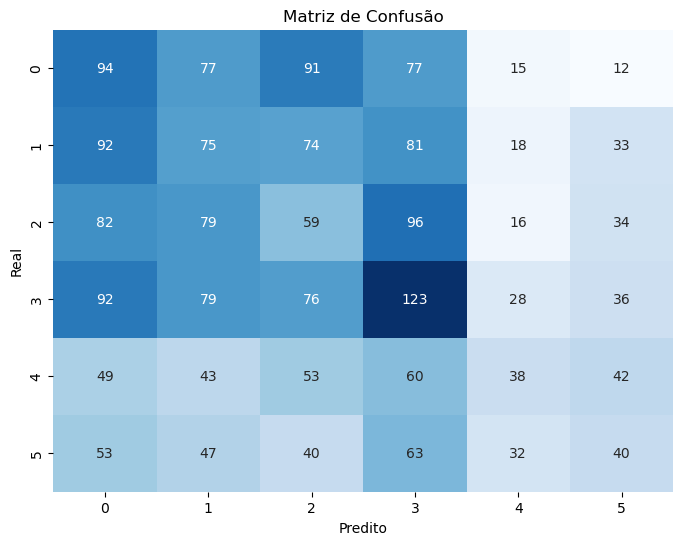

Acurácia: 0.20438303954263934
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.20      0.26      0.23       366
           1       0.19      0.20      0.19       373
           2       0.15      0.16      0.16       366
           3       0.25      0.28      0.26       434
           4       0.26      0.13      0.18       285
           5       0.20      0.15      0.17       275

    accuracy                           0.20      2099
   macro avg       0.21      0.20      0.20      2099
weighted avg       0.21      0.20      0.20      2099



In [53]:
#pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier())])
pipeline_xg = Pipeline([('xg_classifier', xg.XGBClassifier(num_classes = 6) )])
pipeline_lgbm = Pipeline([('lgbm_classifier', lgb.LGBMClassifier(num_classes = 6) )])
#pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])
#pipeline_svr = Pipeline([('svr_classifier', SVM())])

# Lista de todos os pipelines
classifier_pipelines = [ 
                        #pipeline_dt, 
                        #pipeline_rf, 
                        #pipeline_svm,
                        pipeline_xg,
                        pipeline_lgbm
]

# Dicionário de pipelines e tipos de classificadores para facilitar a referência
classifier_pipe_dict = {
                        #0: 'Decision Tree Classifier',
                        #1: 'Random Forest Classifier',
                        #2: 'SVM'
                        3: 'XGBoost Classifier',
                        4: 'LGBM Classifier'
}

# Ajuste dos pipelines
for pipe in classifier_pipelines:
    pipe.fit(w_train, z_train)

# Avaliação do desempenho usando o erro médio quadrático
cv_results_mse = []
for i, model in zip(classifier_pipe_dict.keys(),classifier_pipelines):
    z_pred = model.predict(w_test)
    conf_matrix = confusion_matrix(z_test, z_pred)
    print("Relatório de Classificação:")
    print(classification_report(z_test, z_pred))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()
    
    accuracy = accuracy_score(z_test, z_pred)
    print(f"Acurácia: {accuracy}")
    print("Relatório de Classificação:")
    print(classification_report(z_test, z_pred))


In [54]:
data['Depression_Score'].value_counts()

3    1385
1    1303
2    1300
0    1288
4     878
5     841
Name: Depression_Score, dtype: int64

In [55]:
data['Anxiety_Score'].value_counts()

3    1423
2    1293
1    1267
0    1234
4     907
5     871
Name: Anxiety_Score, dtype: int64

In [56]:
data

,Course,Gender,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,...,Extracurricular_Involvement,Residence_Type,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load,Course_name
0,0,1,3,2,3,2,0,0,0,0,...,2,0,25,3.56,3,3,2,2,17,Others
1,1,0,2,1,2,1,1,1,1,0,...,1,0,23,2.44,0,3,0,3,27,Engineering
2,2,0,3,1,2,2,2,0,1,0,...,3,0,19,3.74,4,0,3,4,15,Business
4,2,1,3,1,2,3,0,0,0,0,...,3,0,18,3.40,3,3,4,0,23,Business
5,3,0,3,2,3,3,1,0,0,0,...,2,1,21,3.35,2,4,3,5,19,Medical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,4,0,2,1,2,2,2,0,1,0,...,2,1,20,3.33,1,1,1,3,28,Law
7017,4,0,3,1,1,3,1,0,2,1,...,3,1,20,3.69,3,1,5,1,26,Law
7018,3,0,3,2,2,3,1,0,1,0,...,1,1,23,3.73,3,4,1,3,15,Medical
7019,0,1,3,3,1,2,0,0,1,0,...,2,1,26,3.65,4,5,1,4,17,Others


In [57]:
len(data.columns)

21

In [58]:
from sklearn.feature_selection import RFE
import pandas as pd

def aplicar_rfe(dataset, model, n_features_to_select):
    # Separando as features (X) e o alvo (y)
    X = dataset.drop(['Depression_Score','Course_name'], axis=1)  # Substitua 'target_column' pelo nome da coluna alvo
    y = dataset['Depression_Score']  # Substitua 'target_column' pelo nome da coluna alvo

    # Inicializando o RFE
    rfe = RFE(model, n_features_to_select=n_features_to_select)

    # Ajustando o RFE aos dados
    rfe.fit(X, y)

    # Obtendo as features selecionadas
    selected_features = X.columns[rfe.support_]

    # Criando um novo DataFrame com as features selecionadas
    dataset_selecionado = dataset[selected_features.append(pd.Index(['Depression_Score']))]

    return dataset_selecionado

data2 = aplicar_rfe(data, xg.XGBClassifier(num_classes = 6) , n_features_to_select=5)

In [59]:
data2

,Course,Diet_Quality,Relationship_Status,Family_History,Semester_Credit_Load,Depression_Score
0,0,3,0,0,17,3
1,1,2,1,0,27,3
2,2,2,2,0,15,0
4,2,2,0,0,23,3
5,3,3,1,0,19,4
...,...,...,...,...,...,...
7016,4,2,2,0,28,1
7017,4,1,1,1,26,1
7018,3,2,1,0,15,4
7019,0,1,0,0,17,5
